In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
df = pd.read_csv("Student Data.csv")

In [ ]:
df.head()

,Marital_Status_Code,Application_Method,Application_Sequence,Program_ID,Attendance_Type,Prior_Qualification_Code,Prior_Qualification_Score,Nationality_Code,Mother's_Education_Level,Father's_Education_Level,...,Credits_2nd_Semester,Enrolled_2nd_Semester,Evaluations_2nd_Semester,Passed_2nd_Semester,Grade_2nd_Semester,No_Evaluations_2nd_Semester,Local_Unemployment_Rate,Inflation_Rate,Regional_GDP,Outcome
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.describe()

,Marital_Status_Code,Application_Method,Application_Sequence,Program_ID,Attendance_Type,Prior_Qualification_Code,Prior_Qualification_Score,Nationality_Code,Mother's_Education_Level,Father's_Education_Level,...,No_Evaluations_1st_Semester,Credits_2nd_Semester,Enrolled_2nd_Semester,Evaluations_2nd_Semester,Passed_2nd_Semester,Grade_2nd_Semester,No_Evaluations_2nd_Semester,Local_Unemployment_Rate,Inflation_Rate,Regional_GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Marital_Status_Code          4424 non-null   int64  
 1   Application_Method           4424 non-null   int64  
 2   Application_Sequence         4424 non-null   int64  
 3   Program_ID                   4424 non-null   int64  
 4   Attendance_Type              4424 non-null   int64  
 5   Prior_Qualification_Code     4424 non-null   int64  
 6   Prior_Qualification_Score    4424 non-null   float64
 7   Nationality_Code             4424 non-null   int64  
 8   Mother's_Education_Level     4424 non-null   int64  
 9   Father's_Education_Level     4424 non-null   int64  
 10  Mother's_Job_Category        4424 non-null   int64  
 11  Father's_Job_Category        4424 non-null   int64  
 12  Admission_Score              4424 non-null   float64
 13  Student_Displaceme

In [ ]:
df.isnull().sum()

,0
Marital_Status_Code,0
Application_Method,0
Application_Sequence,0
Program_ID,0
Attendance_Type,0
Prior_Qualification_Code,0
Prior_Qualification_Score,0
Nationality_Code,0
Mother's_Education_Level,0
Father's_Education_Level,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
cat_codes = [
    'Marital_Status_Code', 'Application_Method', 'Application_Sequence', 'Program_ID',
    'Attendance_Type', 'Prior_Qualification_Code', 'Nationality_Code',
    'Mother\'s_Education_Level', 'Father\'s_Education_Level', 'Mother\'s_Job_Category',
    'Father\'s_Job_Category', 'Student_Displacement_Flag', 'Special_Educational_Needs',
    'Outstanding_Debts_Flag', 'Tuition_Fees_UpToDate_Flag', 'Gender_Code',
    'Scholarship_Recipient_Flag', 'International_Status'
]
for col in cat_codes:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [ ]:
df['Outcome'] = df['Outcome'].astype('category')

In [ ]:
if 'Enrollment_Age' in df.columns:
    age_cap = df['Enrollment_Age'].quantile(0.99)
    df['Enrollment_Age'] = df['Enrollment_Age'].clip(upper=age_cap)

In [ ]:
if 'Admission_Score' in df.columns:
    score_cap = df['Admission_Score'].quantile(0.99)
    df['Admission_Score'] = df['Admission_Score'].clip(upper=score_cap)

In [ ]:
edu_cols = ["Mother's_Education_Level", "Father's_Education_Level"]
for col in edu_cols:
    if col in df.columns:

        df[col] = df[col].astype(float)
        df[col] = df[col].clip(upper=50)

        df[col] = df[col].astype('category')

In [ ]:
grade_cols = ['Grade_1st_Semester', 'Grade_2nd_Semester']
for col in grade_cols:
    if col in df.columns:
        df[col] = df[col].clip(0, 20)

In [ ]:
if all(col in df.columns for col in grade_cols):
    df['Average_Grade'] = (df['Grade_1st_Semester'] + df['Grade_2nd_Semester']) / 2

if all(col in df.columns for col in ['Passed_1st_Semester', 'Enrolled_1st_Semester']):
    df['Credit_Completion_Rate_1st'] = df['Passed_1st_Semester'] / df['Enrolled_1st_Semester'].replace(0, 1)
if all(col in df.columns for col in ['Passed_2nd_Semester', 'Enrolled_2nd_Semester']):
    df['Credit_Completion_Rate_2nd'] = df['Passed_2nd_Semester'] / df['Enrolled_2nd_Semester'].replace(0, 1)

if all(col in df.columns for col in edu_cols):
    df['Parental_Education_Avg'] = (df['Mother\'s_Education_Level'].astype(float) + df['Father\'s_Education_Level'].astype(float)) / 2

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
cat_features = X.select_dtypes(include=['category']).columns.tolist()
num_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ])

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y_encoded)

In [ ]:
X_resampled_df = pd.DataFrame(X_resampled, columns=preprocessor.get_feature_names_out())
y_resampled_df = pd.Series(le.inverse_transform(y_resampled), name='Outcome')

In [ ]:
df_preprocessed = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [ ]:
print(y_resampled_df.value_counts())

Outcome
Dropout     2209
Graduate    2209
Enrolled    2209
Name: count, dtype: int64


In [ ]:
df["Outcome"] = df["Outcome"].astype("category")

In [ ]:
y = df["Outcome"]
print(y)

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Outcome, Length: 4424, dtype: category
Categories (3, object): ['Dropout', 'Enrolled', 'Graduate']


In [ ]:
df_preprocessed.to_csv("Preprocessed_Student_Data.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv("Preprocessed_Student_Data.csv")

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (4638, 266) Test shape: (1989, 266)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.845148315736551
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.90      0.81      0.85       663
    Enrolled       0.82      0.84      0.83       663
    Graduate       0.83      0.89      0.86       663

    accuracy                           0.85      1989
   macro avg       0.85      0.85      0.85      1989
weighted avg       0.85      0.85      0.85      1989



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[534  71  58]
 [ 39 557  67]
 [ 19  54 590]]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 100}
Best score: 0.8380772700219469


In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Feature Importances:\n", importances.head(10))

Top 10 Feature Importances:
 num__Credit_Completion_Rate_2nd    0.099433
num__Passed_2nd_Semester           0.065383
num__Credit_Completion_Rate_1st    0.059041
num__Grade_2nd_Semester            0.045074
num__Passed_1st_Semester           0.044277
num__Average_Grade                 0.044146
num__Grade_1st_Semester            0.033700
num__Evaluations_2nd_Semester      0.030082
num__Evaluations_1st_Semester      0.025364
num__Enrollment_Age                0.022510
dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='f1_macro')
print("Cross-Validation F1 Scores:", scores, "Mean:", scores.mean())

Cross-Validation F1 Scores: [0.78385266 0.79277296 0.87020361 0.89866715 0.9047193 ] Mean: 0.8500431345871361


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))

XGBoost Accuracy: 0.8471593765711413
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       663
           1       0.84      0.82      0.83       663
           2       0.82      0.89      0.85       663

    accuracy                           0.85      1989
   macro avg       0.85      0.85      0.85      1989
weighted avg       0.85      0.85      0.85      1989



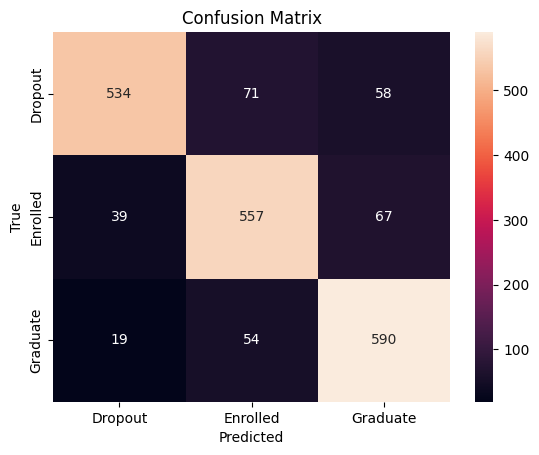

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

df = pd.read_csv("Preprocessed_Student_Data.csv")


X = df.drop('Outcome', axis=1)
y = df['Outcome']


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
print("y_test shape:", y_test.shape, "Expected ~1988")


top_features = [
    'num__Credit_Completion_Rate_2nd',
    'num__Passed_2nd_Semester',
    'num__Credit_Completion_Rate_1st',
    'num__Grade_2nd_Semester',
    'num__Passed_1st_Semester',
    'num__Average_Grade',
    'num__Grade_1st_Semester',
    'num__Evaluations_2nd_Semester',
    'num__Evaluations_1st_Semester',
    'num__Enrollment_Age'
]


X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


model = RandomForestClassifier(random_state=42)
model.fit(X_train_top, y_train)
y_pred = model.predict(X_test_top)
print("y_pred shape:", y_pred.shape)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

y_test shape: (1989,) Expected ~1988
y_pred shape: (1989,)
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.77      0.75      0.76       663
    Enrolled       0.72      0.73      0.73       663
    Graduate       0.81      0.83      0.82       663

    accuracy                           0.77      1989
   macro avg       0.77      0.77      0.77      1989
weighted avg       0.77      0.77      0.77      1989



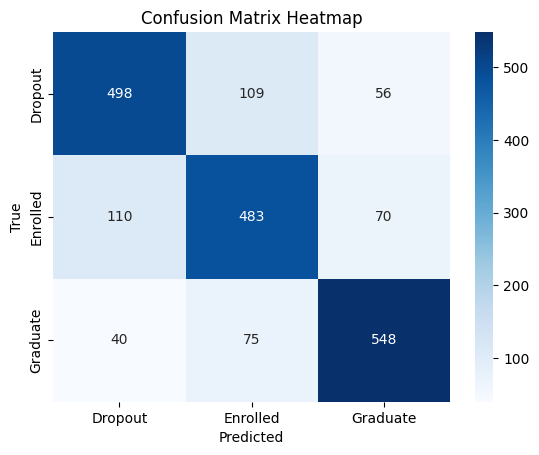

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("Preprocessed_Student_Data.csv")

In [ ]:
df_grad = df[df['Outcome'] == 'Graduate']
print("Graduate students shape:", df_grad.shape)

Graduate students shape: (2209, 267)


In [ ]:
y = df_grad['num__Average_Grade']
X = df_grad.drop(['Outcome', 'num__Average_Grade'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Predicted vs Actual (sample):\n", pd.DataFrame({'Actual': y_test[:5], 'Predicted': y_pred[:5]}))

MSE: 1.6707674512052564e-29
R2 Score: 1.0
Predicted vs Actual (sample):
         Actual  Predicted
1606  0.532274   0.532274
3024 -2.165950  -2.165950
2898  0.410705   0.410705
790   0.636051   0.636051
3042  0.525355   0.525355


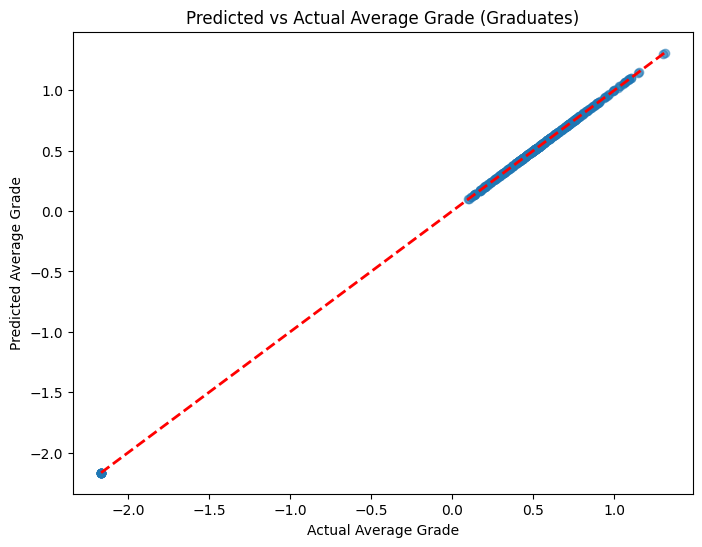

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Average Grade')
plt.ylabel('Predicted Average Grade')
plt.title('Predicted vs Actual Average Grade (Graduates)')
plt.show()